In [1]:
# Stocks - Tesla

In [2]:
## 1. Importing the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Data_O=pd.read_csv('D:/ML_Projects/Stock_Predictions_Tesla/Tesla_Train.csv')
Data_O.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
Data=Data_O.iloc[:, 4:5].values
print(Data.shape)
print(Data)

(1679, 1)
[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [257.      ]
 [246.229996]
 [249.990005]]


In [6]:
## 2. Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0, 1))
Train_Data=sc.fit_transform(Data)
print(Train_Data.shape)

(1679, 1)


In [8]:
print(Train_Data)

[[0.02993635]
 [0.02971433]
 [0.02279455]
 ...
 [0.89253993]
 [0.85268646]
 [0.86660005]]


In [9]:
## 3. Building X and Y

In [10]:
X_train=[]
Y_train=[]
for i in range(60, len(Train_Data)):
    a=[]
    for j in range(i-60, i):
       val=Train_Data[j]
       a.append(val)
    X_train.append(a)
    Y_train.append(Train_Data[i])
X_train=np.array(X_train)
Y_train=np.array(Y_train)
Y_train=Y_train.reshape(-1)

In [11]:
print(X_train)

[[[0.02993635]
  [0.02971433]
  [0.02279455]
  ...
  [0.01946418]
  [0.01839106]
  [0.01506069]]

 [[0.02971433]
  [0.02279455]
  [0.01258141]
  ...
  [0.01839106]
  [0.01506069]
  [0.01391355]]

 [[0.02279455]
  [0.01258141]
  [0.00114713]
  ...
  [0.01506069]
  [0.01391355]
  [0.01591178]]

 ...

 [[0.66725869]
  [0.64302102]
  [0.6423919 ]
  ...
  [0.96799144]
  [0.95363381]
  [0.88880253]]

 [[0.64302102]
  [0.6423919 ]
  [0.61456483]
  ...
  [0.95363381]
  [0.88880253]
  [0.89253993]]

 [[0.6423919 ]
  [0.61456483]
  [0.61304764]
  ...
  [0.88880253]
  [0.89253993]
  [0.85268646]]]


In [12]:
print(X_train.shape)
print(Y_train.shape)

(1619, 60, 1)
(1619,)


In [13]:
## 3. Building the LSTM Cell

In [14]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [15]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
## 4. Training the model

In [17]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
51/51 [==============================] - 10s 72ms/step - loss: 0.0802
Epoch 2/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0073
Epoch 3/100
51/51 [==============================] - 3s 67ms/step - loss: 0.0072
Epoch 4/100
51/51 [==============================] - 3s 66ms/step - loss: 0.0055
Epoch 5/100
51/51 [==============================] - 4s 69ms/step - loss: 0.0058
Epoch 6/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0052
Epoch 7/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0050
Epoch 8/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0052
Epoch 9/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0044
Epoch 10/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0040
Epoch 11/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0041
Epoch 12/100
51/51 [==============================] - 4s 70ms/step - loss: 0.0046
Epoch 13/100
51/51 [====

In [18]:
## 5. Predicting Results

In [19]:
Data_1_O=pd.read_csv('D:/ML_Projects/Stock_Predictions_Tesla/Tesla_Test.csv')
Data_1_O.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,03-01-2017,254.179993,254.850006,249.110001,250.020004,4800300,250.020004
1,03-02-2017,249.710007,253.279999,248.270004,250.479996,3342300,250.479996
2,03-03-2017,250.740005,251.899994,249.000000,251.570007,2919400,251.570007
3,03-06-2017,247.910004,251.699997,247.509995,251.210007,3351200,251.210007
4,03-07-2017,251.919998,253.889999,248.320007,248.589996,3449200,248.589996


In [20]:
Data_1=Data_1_O.iloc[:, 4:5].values
print(Data_1.shape)
print(Data_1)

(13, 1)
[[250.020004]
 [250.479996]
 [251.570007]
 [251.210007]
 [248.589996]
 [246.869995]
 [244.899994]
 [243.690002]
 [246.169998]
 [258.      ]
 [255.729996]
 [262.049988]
 [261.5     ]]


In [21]:
Concat_DataSet=pd.concat((Data_O['Close'], Data_1_O['Close']), axis=0)
Concat_DataSet=Concat_DataSet.values
print(Concat_DataSet)
print(Concat_DataSet.shape)

[ 23.889999  23.83      21.959999 ... 255.729996 262.049988 261.5     ]
(1692,)


In [22]:
inputs=[]
for i in range((len(Concat_DataSet)-len(Data_1)-60),len(Concat_DataSet)):
    val=Concat_DataSet[i]
    inputs.append(val)
inputs=np.array(inputs)
print(inputs.shape)

(73,)


In [23]:
inputs=inputs.reshape(73, 1)
inputs=sc.transform(inputs)
print(inputs.shape)

(73, 1)


In [24]:
X_test=[]
for i in range(0, 13):
    b=[]
    for j in range(i, 60+i):
        b.append(inputs[j])
    X_test.append(b)
X_test=np.array(X_test)
print(X_test.shape)
print(X_test)

(13, 60, 1)
[[[0.61456483]
  [0.61304764]
  [0.63277086]
  [0.62925548]
  [0.65626846]
  [0.6530861 ]
  [0.65267905]
  [0.65360416]
  [0.67477053]
  [0.67676878]
  [0.67266132]
  [0.69083037]
  [0.69171843]
  [0.71414293]
  [0.7101095 ]
  [0.71288481]
  [0.73097983]
  [0.75388541]
  [0.75466252]
  [0.73593837]
  [0.732275  ]
  [0.74448638]
  [0.78149052]
  [0.7806024 ]
  [0.78896532]
  [0.79736527]
  [0.79214768]
  [0.79162962]
  [0.79111156]
  [0.82130696]
  [0.81327707]
  [0.82356422]
  [0.84354643]
  [0.84713584]
  [0.86264058]
  [0.88369595]
  [0.88317789]
  [0.87592506]
  [0.87755325]
  [0.86896831]
  [0.87377881]
  [0.86382474]
  [0.87237269]
  [0.87155859]
  [0.89538921]
  [0.89431617]
  [0.91133799]
  [0.93768503]
  [0.93779604]
  [0.97986973]
  [0.98127591]
  [0.9767614 ]
  [0.93675993]
  [0.94889729]
  [0.96799144]
  [0.95363381]
  [0.88880253]
  [0.89253993]
  [0.85268646]
  [0.86660005]]

 [[0.61304764]
  [0.63277086]
  [0.62925548]
  [0.65626846]
  [0.6530861 ]
  [0.652679

In [25]:
predicted_stocks=model.predict(X_test)
predicted_stocks=sc.inverse_transform(predicted_stocks)
print(predicted_stocks)
print(predicted_stocks.shape)

[[242.82056]
 [242.98436]
 [243.69194]
 [244.31728]
 [244.15971]
 [242.5648 ]
 [240.5837 ]
 [238.72624]
 [237.41158]
 [237.97203]
 [243.89162]
 [247.58453]
 [251.17133]]
(13, 1)


In [26]:
## 6. Visualisng the Graphs

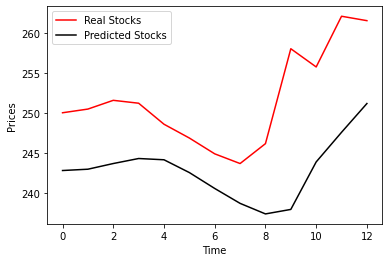

In [27]:
plt.plot(Data_1, color='red', label='Real Stocks')
plt.plot(predicted_stocks, color='black', label='Predicted Stocks')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()